In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["font.family"] = "Malgun Gothic"
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
df = pd.read_csv("dataSet/chat_df.csv")

In [3]:
df

,성별,나이,학력,전공,학습이해도,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함
0,남,20대,대졸,기술,51 ~ 70%,2개월,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0
1,여,30대,고졸,NaN,51 ~ 70%,3,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0
2,여,20대,대졸,경제학,51 ~ 70%,2개월,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0
3,남,20대,대졸,기계공학,51 ~ 70%,4,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0
4,여,20대,대재,글로벌MICE,51 ~ 70%,3,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0
5,남,20대,대졸,행정학,71 ~ 80%,3개월,4.0,3.9,4.5,3.5,2.0,2.0,4,4.000000,3.0
6,남,20대,대졸,전자정보통신,51 ~ 70%,3개월,4.0,4.0,3.5,4.0,3.5,3.5,4,3.000000,3.0
7,여,20대,대졸,경영학과,50% 미만,3,3.9,3.5,4.0,2.5,2.5,1.0,3,3.666667,5.0
8,남,20대,대졸,컴퓨터소프트웨어,50% 미만,1,4.4,3.5,4.5,2.0,1.0,3.0,1,4.666667,3.0
9,남,40대 이상,대졸,수학,71 ~ 80%,3,4.3,3.9,4.5,3.5,3.5,3.5,4,3.666667,2.0


In [4]:
def categorize_major(major):
    if major in ['기술', '기계공학', '전자정보통신', '컴퓨터소프트웨어', '수학','의료공학과','생명과학',\
                 'Management Information System','빅데이터']:
        return '과학'
    elif major in ['경제학','글로벌MICE','행정학','경영학과','무역학과']:
        return '사회과학'
    else:  
        return '기타'

In [5]:
df["전공"] = df["전공"].apply(categorize_major)

In [6]:
df

,성별,나이,학력,전공,학습이해도,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함
0,남,20대,대졸,과학,51 ~ 70%,2개월,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0
1,여,30대,고졸,기타,51 ~ 70%,3,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0
2,여,20대,대졸,사회과학,51 ~ 70%,2개월,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0
3,남,20대,대졸,과학,51 ~ 70%,4,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0
4,여,20대,대재,사회과학,51 ~ 70%,3,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0
5,남,20대,대졸,사회과학,71 ~ 80%,3개월,4.0,3.9,4.5,3.5,2.0,2.0,4,4.000000,3.0
6,남,20대,대졸,과학,51 ~ 70%,3개월,4.0,4.0,3.5,4.0,3.5,3.5,4,3.000000,3.0
7,여,20대,대졸,사회과학,50% 미만,3,3.9,3.5,4.0,2.5,2.5,1.0,3,3.666667,5.0
8,남,20대,대졸,과학,50% 미만,1,4.4,3.5,4.5,2.0,1.0,3.0,1,4.666667,3.0
9,남,40대 이상,대졸,과학,71 ~ 80%,3,4.3,3.9,4.5,3.5,3.5,3.5,4,3.666667,2.0


In [7]:
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

In [8]:
cdf = df.copy()
cdf["사용기간"] = cdf["사용기간"].astype(str)
cdf["사용기간"] = cdf["사용기간"].str.extract("(\d)")
cdf["나이"] = cdf["나이"].str.extract("(\d+)")
cdf = label_encode(cdf, ["성별","학력","전공","사용기간","나이"])
cdf

,성별,나이,학력,전공,학습이해도,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함
0,0,0,2,0,51 ~ 70%,1,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0
1,1,1,0,1,51 ~ 70%,2,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0
2,1,0,2,2,51 ~ 70%,1,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0
3,0,0,2,0,51 ~ 70%,3,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0
4,1,0,1,2,51 ~ 70%,2,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0
5,0,0,2,2,71 ~ 80%,2,4.0,3.9,4.5,3.5,2.0,2.0,4,4.000000,3.0
6,0,0,2,0,51 ~ 70%,2,4.0,4.0,3.5,4.0,3.5,3.5,4,3.000000,3.0
7,1,0,2,2,50% 미만,2,3.9,3.5,4.0,2.5,2.5,1.0,3,3.666667,5.0
8,0,0,2,0,50% 미만,0,4.4,3.5,4.5,2.0,1.0,3.0,1,4.666667,3.0
9,0,2,2,0,71 ~ 80%,2,4.3,3.9,4.5,3.5,3.5,3.5,4,3.666667,2.0


In [9]:
cdf["이해도"] = cdf["학습이해도"].apply(lambda x : 0 if x == "50% 미만" else\
                                (1 if x == "51 ~ 70%" else (2 if x == "71 ~ 80%" else \
                                                            (3 if x == "81 ~ 90%" else 4))))

In [10]:
cdf.drop("학습이해도", axis = 1, inplace = True)

In [11]:
cdf

,성별,나이,학력,전공,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도
0,0,0,2,0,1,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0,1
1,1,1,0,1,2,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0,1
2,1,0,2,2,1,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0,1
3,0,0,2,0,3,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0,1
4,1,0,1,2,2,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0,1
5,0,0,2,2,2,4.0,3.9,4.5,3.5,2.0,2.0,4,4.000000,3.0,2
6,0,0,2,0,2,4.0,4.0,3.5,4.0,3.5,3.5,4,3.000000,3.0,1
7,1,0,2,2,2,3.9,3.5,4.0,2.5,2.5,1.0,3,3.666667,5.0,0
8,0,0,2,0,0,4.4,3.5,4.5,2.0,1.0,3.0,1,4.666667,3.0,0
9,0,2,2,0,2,4.3,3.9,4.5,3.5,3.5,3.5,4,3.666667,2.0,2


In [12]:
cdf["불편함"].fillna(list(cdf["불편함"].value_counts().index)[0], inplace = True)

In [13]:
cdf = cdf[['성별', '나이', '학력', '전공', '사용기간','인지', '감성', '사회', '심리',
       '몰입감', '상호작용', '불편함', '이해도', '학습효과', '만족도']]

In [14]:
cdf

,성별,나이,학력,전공,사용기간,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도,학습효과,만족도
0,0,0,2,0,1,5.0,3.0,1.0,1.0,5,5.000000,3.0,1,4.9,4.5
1,1,1,0,1,2,4.0,3.5,2.5,2.0,3,3.000000,4.0,1,3.7,3.8
2,1,0,2,2,1,4.0,2.0,1.0,1.0,1,4.000000,4.0,1,4.6,4.7
3,0,0,2,0,3,5.0,4.5,1.0,2.5,1,4.666667,4.0,1,4.6,4.8
4,1,0,1,2,2,4.0,4.5,1.5,3.0,2,2.666667,5.0,1,4.1,4.4
5,0,0,2,2,2,4.5,3.5,2.0,2.0,4,4.000000,3.0,2,3.9,4.0
6,0,0,2,0,2,3.5,4.0,3.5,3.5,4,3.000000,3.0,1,4.0,4.0
7,1,0,2,2,2,4.0,2.5,2.5,1.0,3,3.666667,5.0,0,3.5,3.9
8,0,0,2,0,0,4.5,2.0,1.0,3.0,1,4.666667,3.0,0,3.5,4.4
9,0,2,2,0,2,4.5,3.5,3.5,3.5,4,3.666667,2.0,2,3.9,4.3


Text(0.5, 1.0, 'Correlation Heatmap')

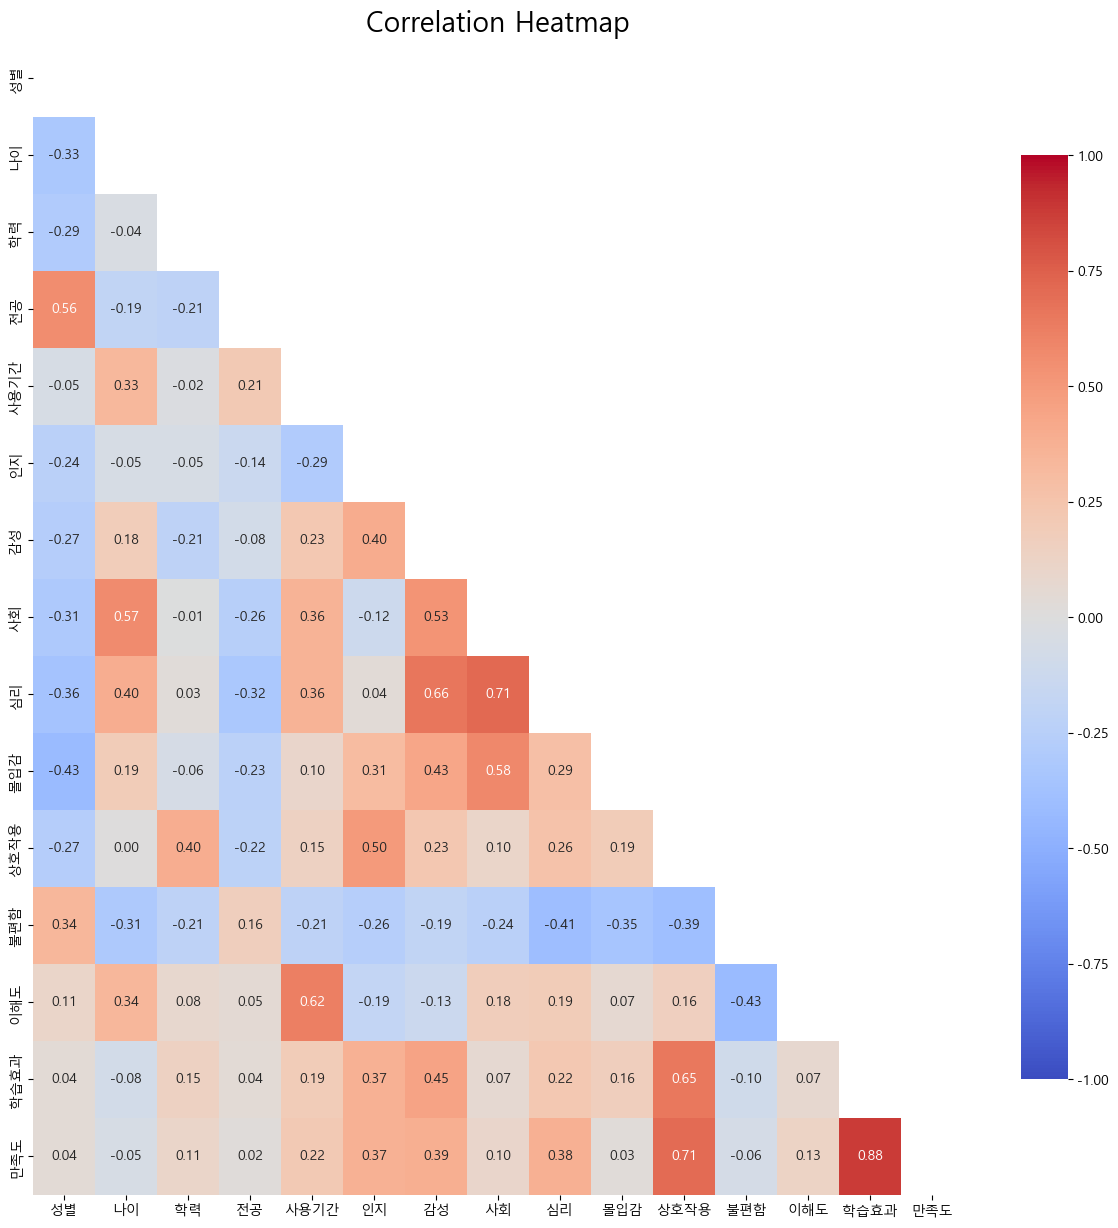

In [25]:
corr = cdf.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (15,15))

sns.heatmap(corr, mask = mask, cmap = "coolwarm", annot = True, fmt = ".2f", vmin = -1, vmax = 1, cbar_kws = {"shrink" : 0.8})
plt.title("Correlation Heatmap", fontsize = 20)

In [31]:
cdf[["인지", "감성", "심리", "상호작용","불편함","만족도"]]

,인지,감성,심리,상호작용,만족도
0,5.0,3.0,1.0,5.000000,4.5
1,4.0,3.5,2.0,3.000000,3.8
2,4.0,2.0,1.0,4.000000,4.7
3,5.0,4.5,2.5,4.666667,4.8
4,4.0,4.5,3.0,2.666667,4.4
5,4.5,3.5,2.0,4.000000,4.0
6,3.5,4.0,3.5,3.000000,4.0
7,4.0,2.5,1.0,3.666667,3.9
8,4.5,2.0,3.0,4.666667,4.4
9,4.5,3.5,3.5,3.666667,4.3


In [30]:
cdf[["사용기간", "인지", "감성", "심리", "상호작용", "불편함", "학습효과"]]

,사용기간,인지,감성,심리,상호작용,학습효과
0,1,5.0,3.0,1.0,5.000000,4.9
1,2,4.0,3.5,2.0,3.000000,3.7
2,1,4.0,2.0,1.0,4.000000,4.6
3,3,5.0,4.5,2.5,4.666667,4.6
4,2,4.0,4.5,3.0,2.666667,4.1
5,2,4.5,3.5,2.0,4.000000,3.9
6,2,3.5,4.0,3.5,3.000000,4.0
7,2,4.0,2.5,1.0,3.666667,3.5
8,0,4.5,2.0,3.0,4.666667,3.5
9,2,4.5,3.5,3.5,3.666667,3.9


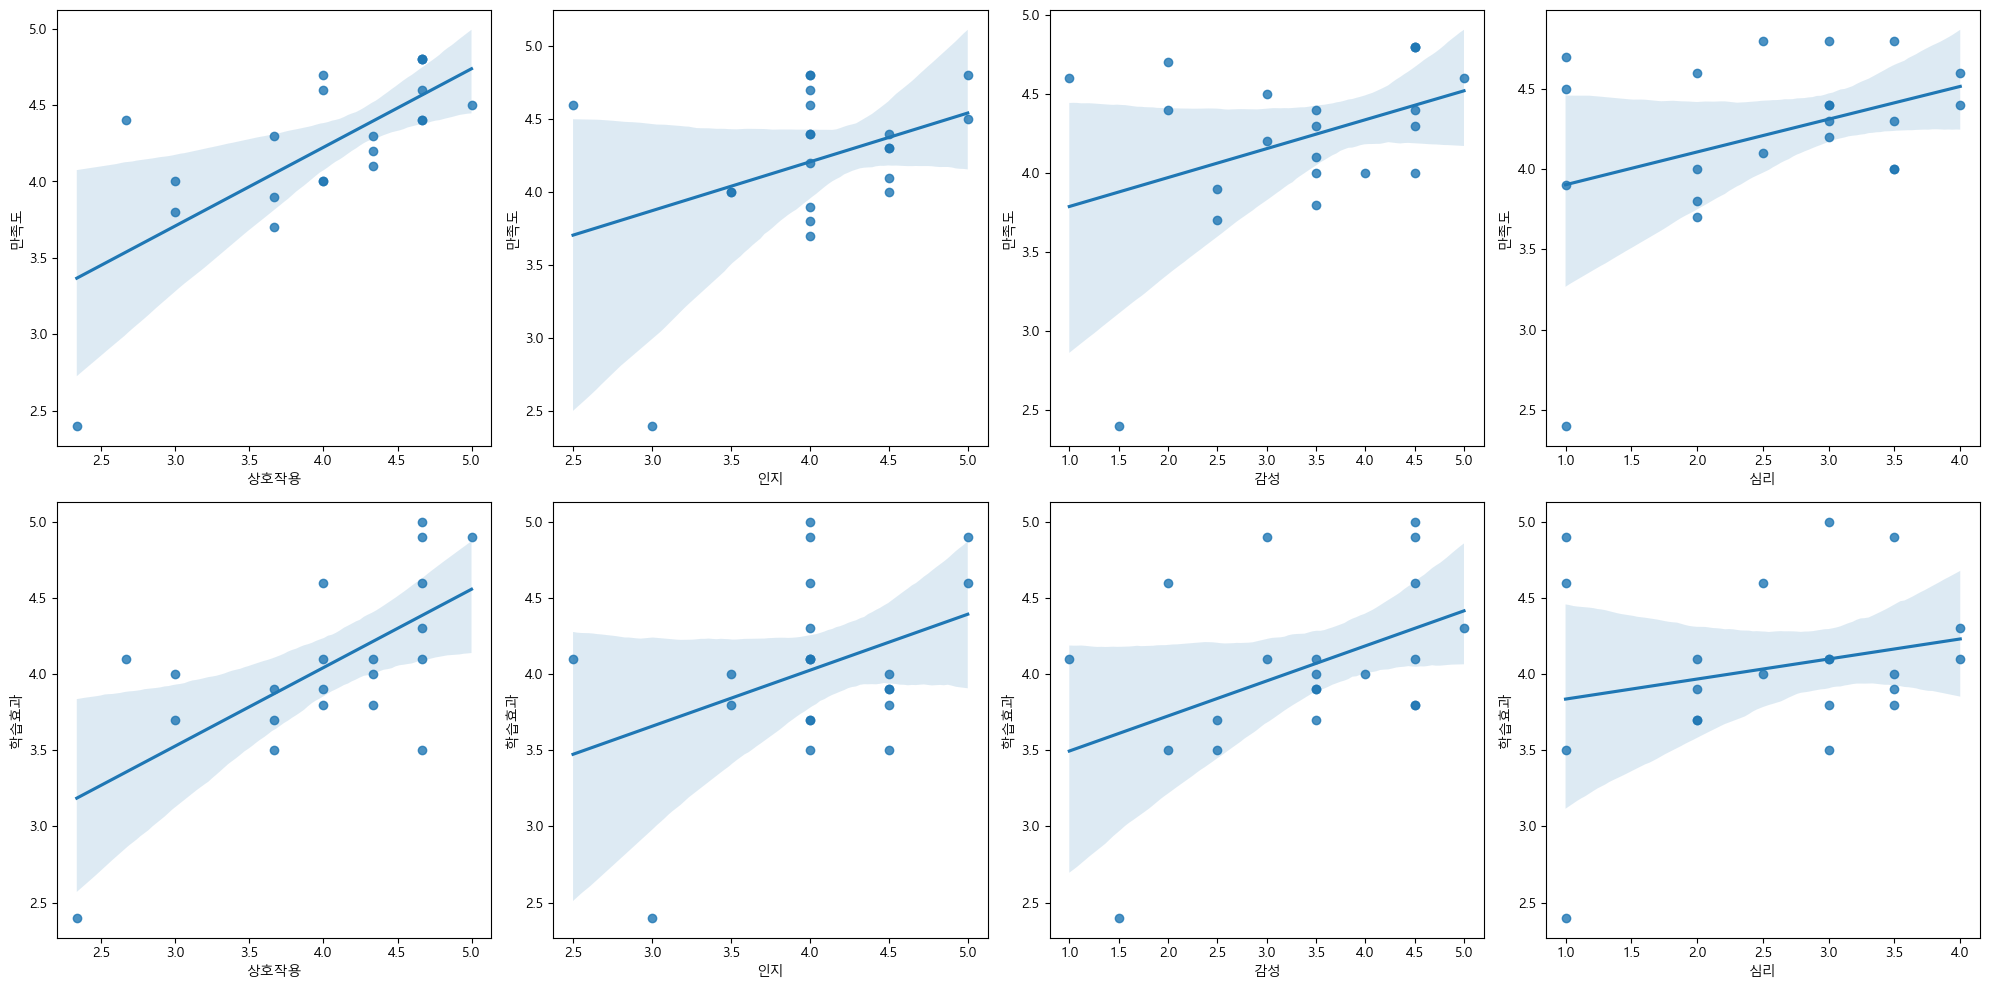

In [33]:
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))

sns.regplot(data = cdf, x = "상호작용", y = "만족도", ax = axs[0,0])
sns.regplot(data = cdf, x = "인지", y = "만족도", ax = axs[0,1])
sns.regplot(data = cdf, x = "감성", y = "만족도", ax = axs[0,2])
sns.regplot(data = cdf, x = "심리", y = "만족도", ax = axs[0,3])
sns.regplot(data = cdf, x = "상호작용", y = "학습효과", ax = axs[1,0])
sns.regplot(data = cdf, x = "인지", y = "학습효과", ax = axs[1,1])
sns.regplot(data = cdf, x = "감성", y = "학습효과", ax = axs[1,2])
sns.regplot(data = cdf, x = "심리", y = "학습효과", ax = axs[1,3])


plt.tight_layout()

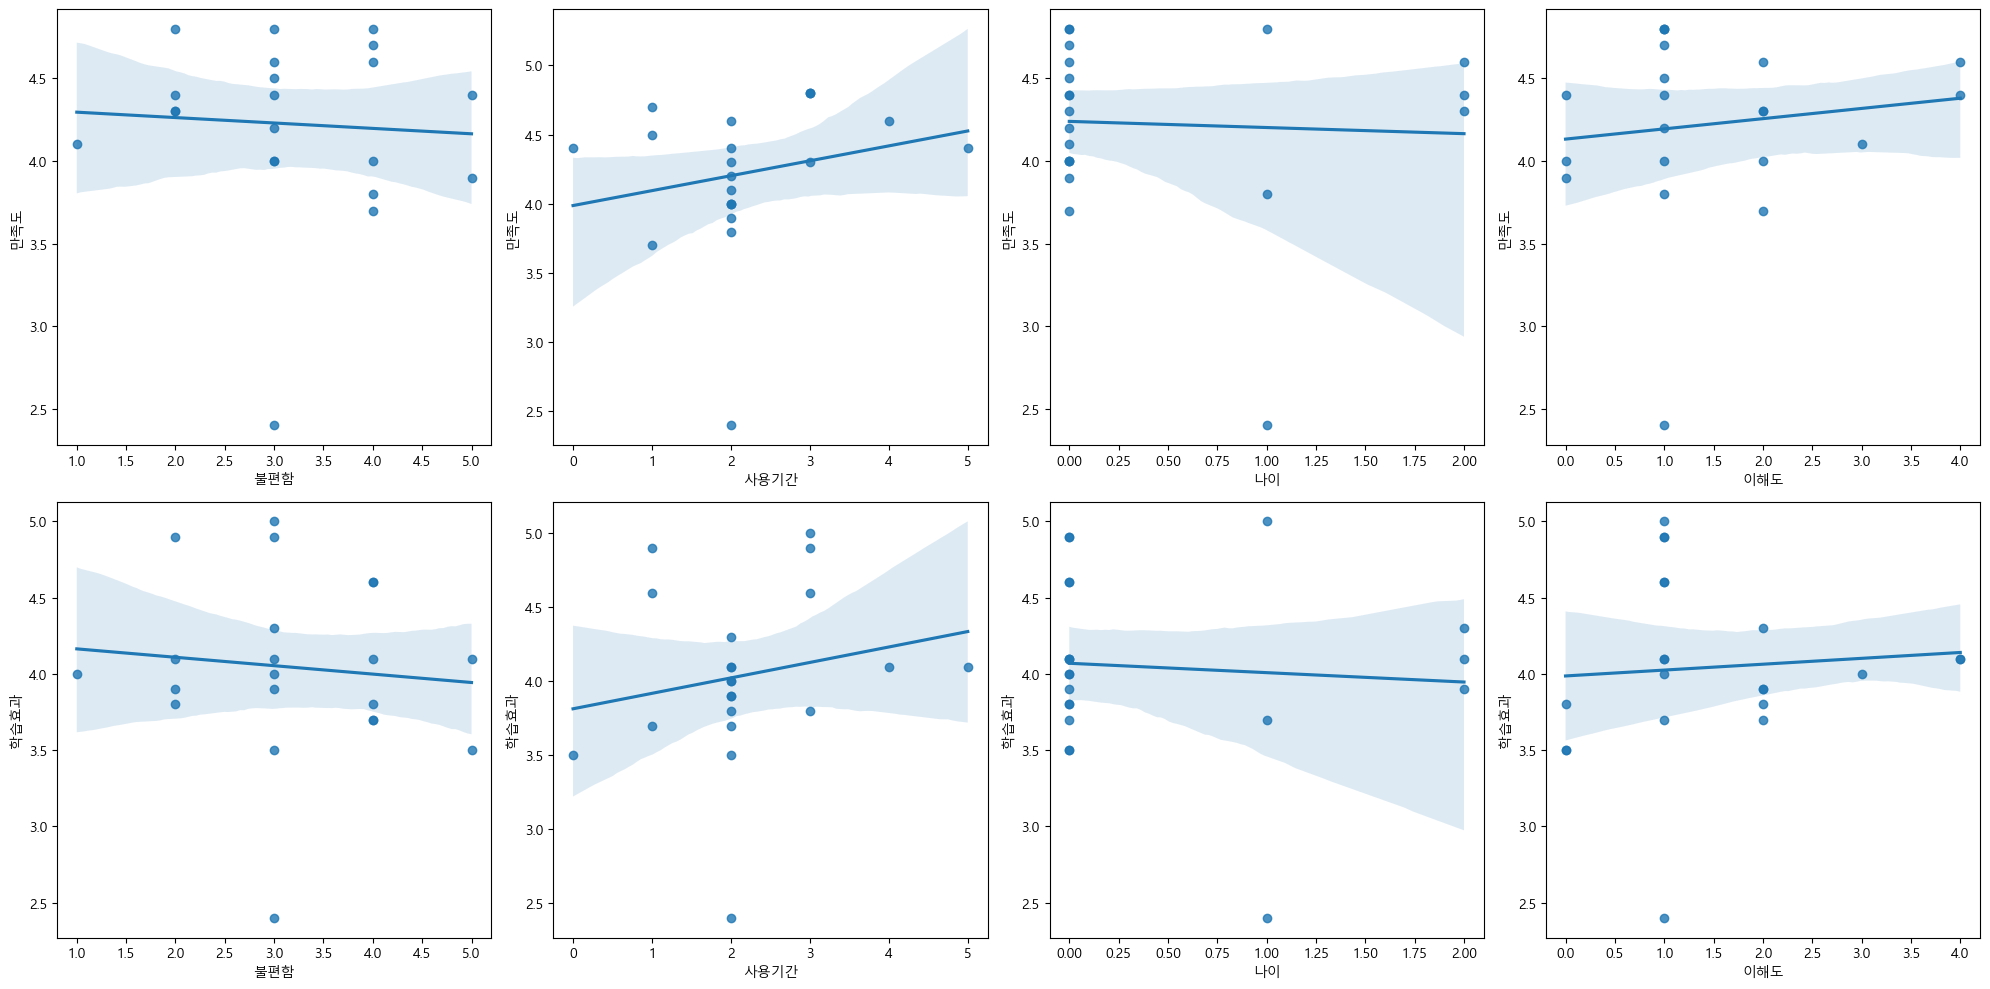

In [34]:
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))

sns.regplot(data = cdf, x = "불편함", y = "만족도", ax = axs[0,0])
sns.regplot(data = cdf, x = "사용기간", y = "만족도", ax = axs[0,1])
sns.regplot(data = cdf, x = "나이", y = "만족도", ax = axs[0,2])
sns.regplot(data = cdf, x = "이해도", y = "만족도", ax = axs[0,3])
sns.regplot(data = cdf, x = "불편함", y = "학습효과", ax = axs[1,0])
sns.regplot(data = cdf, x = "사용기간", y = "학습효과", ax = axs[1,1])
sns.regplot(data = cdf, x = "나이", y = "학습효과", ax = axs[1,2])
sns.regplot(data = cdf, x = "이해도", y = "학습효과", ax = axs[1,3])


plt.tight_layout()

<AxesSubplot:xlabel='학습효과', ylabel='Count'>

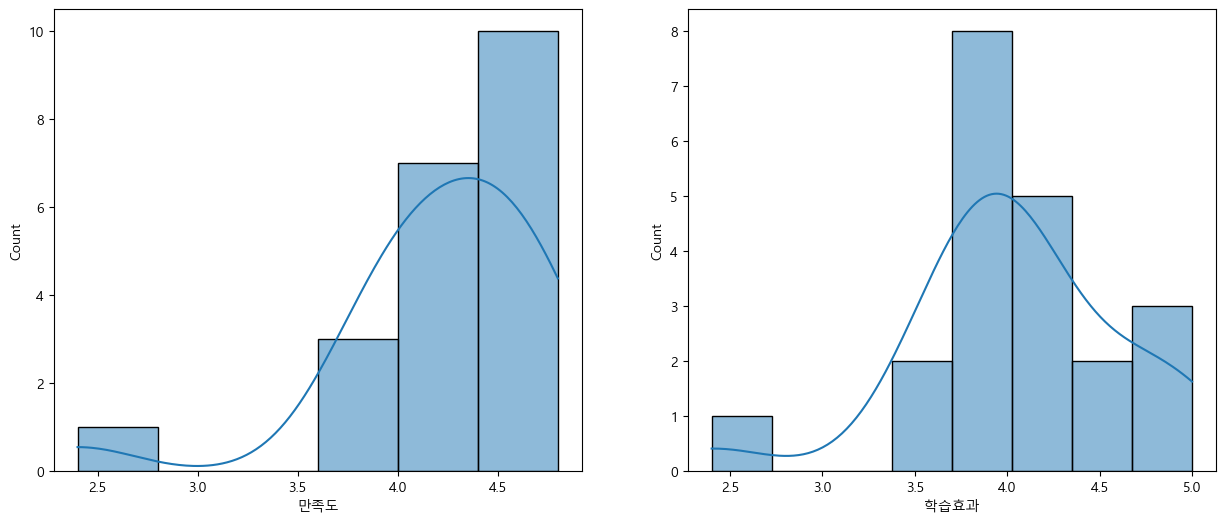

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15,6))

sns.histplot(data = cdf, x = "만족도", kde = True, ax = ax[0])
sns.histplot(data = cdf, x = "학습효과", kde = True, ax = ax[1])

In [37]:
cdf.to_csv("cdf.csv", index = False)

In [36]:
cdf1 = cdf[["인지", "감성", "심리", "상호작용","불편함","만족도"]]
cdf2 = cdf[["사용기간", "인지", "감성", "심리", "상호작용", "불편함", "학습효과"]]

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_data = cdf1.drop(["만족도"], axis = 1, inplace = False)
y_target = cdf1["만족도"]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size= 0.2, random_state = 1)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)

print(f"MSE : {mse: .3f}, RMSE : {rmse: .3f}")

MSE :  0.067, RMSE :  0.260


In [41]:
from sklearn.model_selection import cross_val_score

In [49]:
scores = cross_val_score(lr , X_data , y_target , scoring= 'neg_mean_squared_error',cv=5)


rmse_scores = np.sqrt(-1 * scores)
print(rmse_scores)
print(round(rmse_scores.mean(),3))

[0.61487871 0.32355146 0.4895894  0.66316294 0.66229583]
0.551


Text(0.5, 0, 'Relative importance')

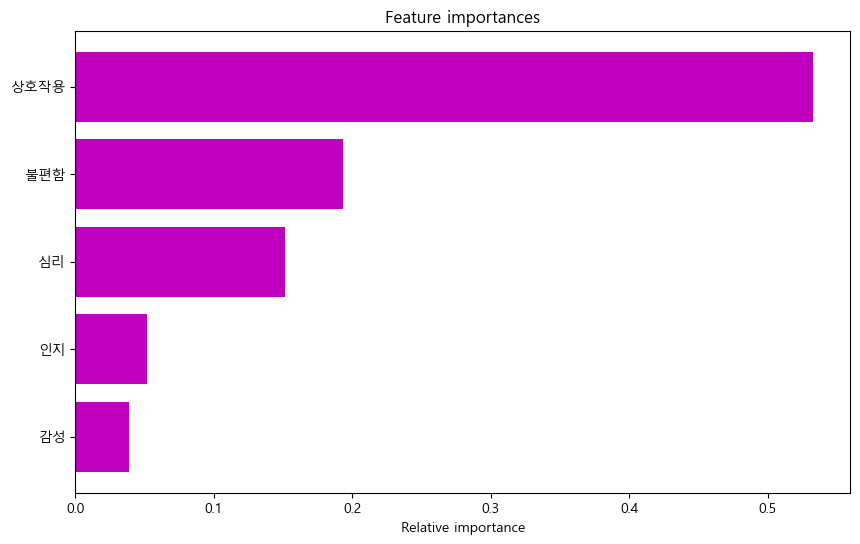

In [51]:
lr.fit(X_data, y_target)

importance = np.abs(lr.coef_)

feature_names = X_data.columns
indices = np.argsort(importance)

plt.figure(figsize = (10,6))
plt.title("Feature importances")
plt.barh(range(len(indices)), importance[indices], color = "m", align = "center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative importance")

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_data = cdf2.drop(["학습효과"], axis = 1, inplace = False)
y_target = cdf2["학습효과"]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size= 0.2, random_state = 1)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)

print(f"MSE : {mse: .3f}, RMSE : {rmse: .3f}")

MSE :  0.136, RMSE :  0.369


In [53]:
scores = cross_val_score(lr , X_data , y_target , scoring= 'neg_mean_squared_error',cv=5)


rmse_scores = np.sqrt(-1 * scores)
print(rmse_scores)
print(round(rmse_scores.mean(),3))

[0.70476078 0.68450844 0.54700784 0.58188274 0.81013867]
0.666


Text(0.5, 0, 'Relative importance')

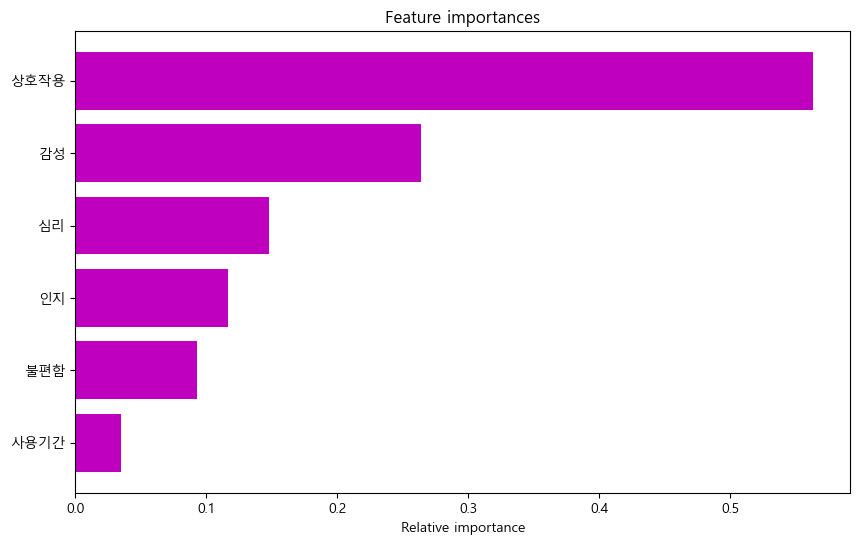

In [54]:
lr.fit(X_data, y_target)

importance = np.abs(lr.coef_)

feature_names = X_data.columns
indices = np.argsort(importance)

plt.figure(figsize = (10,6))
plt.title("Feature importances")
plt.barh(range(len(indices)), importance[indices], color = "m", align = "center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative importance")

In [55]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [56]:
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True, return_coeff = True):
    coeff_df = pd.DataFrame()
    if verbose : print("#######", model_name, "#######")
    for param in params:
        if model_name == "Ridge" : model = Ridge(alpha = param)
        elif model_name == "Lasso" : model = Lasso(alpha = param)
        elif model_name == "ElasticNet" : model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = "neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        
        print(f"alpha {param}일 때 5폴드 세트의 평균 RMSE : {avg_rmse:.3f}")
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data = model.coef_, index = X_data_n.columns)
            colname = "alpha : " + str(param)
            coeff_df[colname] = coeff
    return coeff_df

In [58]:
elastic_alphas = [0, 0.05, 0.1, 0.5]
coeff_elastic_df = get_linear_reg_eval("Ridge", params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)

####### Ridge #######
alpha 0일 때 5폴드 세트의 평균 RMSE : 0.666
alpha 0.05일 때 5폴드 세트의 평균 RMSE : 0.661
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 0.657
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 0.636


In [59]:
elastic_alphas = [0, 0.05, 0.1, 0.5]
coeff_elastic_df = get_linear_reg_eval("Lasso", params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)

####### Lasso #######
alpha 0일 때 5폴드 세트의 평균 RMSE : 0.666
alpha 0.05일 때 5폴드 세트의 평균 RMSE : 0.559
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 0.542
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 0.589


In [57]:
elastic_alphas = [0, 0.05, 0.1, 0.5]
coeff_elastic_df = get_linear_reg_eval("ElasticNet", params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)

####### ElasticNet #######
alpha 0일 때 5폴드 세트의 평균 RMSE : 0.666
alpha 0.05일 때 5폴드 세트의 평균 RMSE : 0.575
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 0.547
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 0.590


In [60]:
def get_scaled_data(method = "None", p_degree = None, input_data = None):
    if method == "Standard":
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == "MinMax":
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == "Log":
        scaled_data = np.log1p(input_data)
    else :
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree = p_degree,
                                        include_bias = False).fit_transform(scaled_data)
    return scaled_data

In [63]:
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ("Standard", None), ("Standard", 2),
                ("MinMax", None),("MinMax", 2),("Log", None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], input_data = X_data)
    
    print(f"\n변환 유형 : {scale_method[0]}, Polynomial Degree : {scale_method[1]}")
    get_linear_reg_eval("Ridge", params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = True, return_coeff = False)


변환 유형 : None, Polynomial Degree : None
####### Ridge #######
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 0.657
alpha 1일 때 5폴드 세트의 평균 RMSE : 0.622
alpha 10일 때 5폴드 세트의 평균 RMSE : 0.574
alpha 100일 때 5폴드 세트의 평균 RMSE : 0.574

변환 유형 : Standard, Polynomial Degree : None
####### Ridge #######
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 0.660
alpha 1일 때 5폴드 세트의 평균 RMSE : 0.629
alpha 10일 때 5폴드 세트의 평균 RMSE : 0.577
alpha 100일 때 5폴드 세트의 평균 RMSE : 0.570

변환 유형 : Standard, Polynomial Degree : 2
####### Ridge #######
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 1.135
alpha 1일 때 5폴드 세트의 평균 RMSE : 0.999
alpha 10일 때 5폴드 세트의 평균 RMSE : 0.760
alpha 100일 때 5폴드 세트의 평균 RMSE : 0.626

변환 유형 : MinMax, Polynomial Degree : None
####### Ridge #######
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 0.620
alpha 1일 때 5폴드 세트의 평균 RMSE : 0.570
alpha 10일 때 5폴드 세트의 평균 RMSE : 0.573
alpha 100일 때 5폴드 세트의 평균 RMSE : 0.587

변환 유형 : MinMax, Polynomial Degree : 2
####### Ridge #######
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 0.693
alpha 1일 때 5폴드 세트의 평균 RMSE : 0.587
alpha 10일 때 5폴드 세트의 평균 RMSE : 0.